# Objective: 📚🏆

The idea of ​​this project is to describe and compare, qualitatively and quantitatively, the global behavior of two databases.

### 📚 Import Libraries 📚

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import cartopy.crs as ccrs
import cmweather
import pyart
import wradlib as wrl
import xradar as xd

### 💾 Reading Data 💾

In [3]:
radar_pa = pyart.io.read_sigmet(f"./data/CAR220809191504.RAWDSX2")  # Read Data 
radar_pa.info("compact")    # View info about

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (720,)>
elevation: <ndarray of type: float32 and shape: (720,)>
fields:
	total_power: <ndarray of type: float32 and shape: (720, 994)>
	reflectivity: <ndarray of type: float32 and shape: (720, 994)>
	velocity: <ndarray of type: float32 and shape: (720, 994)>
	spectrum_width: <ndarray of type: float32 and shape: (720, 994)>
	differential_reflectivity: <ndarray of type: float32 and shape: (720, 994)>
	specific_differential_phase: <ndarray of type: float32 and shape: (720, 994)>
	differential_phase: <ndarray of type: float32 and shape: (720, 994)>
	normalized_coherent_power: <ndarray of type: float32 and shape: (720, 994)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (720, 994)>
	radar_echo_classification: <ndarray of type: float32 and shape: (720, 994)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters

This part is important because it allows us to form an idea of the type of information data we have. We can access variables like fields:

As we can see, the data type for the reflectivity variable is float, and it also provides us with valuable information such as the unit of measurement, which is dBZ, as well as other relevant details like the standard name and coordinates. 

In [4]:
radar_pa.fields['reflectivity']

{'units': 'dBZ',
 'standard_name': 'equivalent_reflectivity_factor',
 'long_name': 'Reflectivity',
 'coordinates': 'elevation azimuth range',
 'data': masked_array(
   data=[[18.5, 20.5, 22.5, ..., --, --, --],
         [26.0, 28.0, 29.0, ..., --, --, --],
         [24.0, 25.5, 26.5, ..., --, --, --],
         ...,
         [25.0, 28.0, 30.0, ..., --, --, --],
         [27.5, 30.0, 31.5, ..., --, --, --],
         [26.0, 27.5, 28.5, ..., --, --, --]],
   mask=[[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True]],
   fill_value=1e+20,
   dtype=float32),
 '_FillValue': -9999.0}

However, this command does not provide a straightforward way to access the instances, which is precisely what we need to conduct some interesting statistical studies. Therefore, we will use the `Wradlib library`.

In [5]:
radar_wrl = wrl.io.read_iris(f"./data/CAR220809191504.RAWDSX2")
radar_wrl.keys()

odict_keys(['product_hdr', 'product_type', 'ingest_header', 'nsweeps', 'nrays', 'nbins', 'data_types', 'data', 'raw_product_bhdrs'])

Here, we can see the variables's `keys`, and we are interested in the key `data`

In [6]:
Reflectivity = radar_wrl["data"][1]["sweep_data"]["DB_DBZ"] #Def a new variable with reflectivity's instences
Reflectivity_n = Reflectivity.shape[0] * Reflectivity.shape[1]  #How many instances do we have?

print(Reflectivity) #Print variable's instances
print()
print('Arrays shape: {}'.format(Reflectivity.shape))
print()
print('Total instances of the reflectivity variable: {}'.format(Reflectivity_n)) 

[[ 18.5  20.5  22.5 ... -32.  -32.  -32. ]
 [ 26.   28.   29.  ... -32.  -32.  -32. ]
 [ 24.   25.5  26.5 ... -32.  -32.  -32. ]
 ...
 [ 25.   28.   30.  ... -32.  -32.  -32. ]
 [ 27.5  30.   31.5 ... -32.  -32.  -32. ]
 [ 26.   27.5  28.5 ... -32.  -32.  -32. ]]

Arrays shape: (720, 994)

Total instances of the reflectivity variable: 715680


## Nature of data 🌎📊

We can use the 🐼 `pandas` 🐼 library to understand the nature of the data

In [7]:
Reflectivity_pd = pd.DataFrame(Reflectivity)
Reflectivity_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Columns: 994 entries, 0 to 993
dtypes: float64(994)
memory usage: 5.5 MB


In [8]:
Reflectivity_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,984,985,986,987,988,989,990,991,992,993
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.00000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,20.359722,26.183333,26.485417,26.662500,25.779167,22.984722,21.631944,20.657639,20.524306,20.34375,...,-31.630556,-31.632639,-31.565278,-31.569444,-31.693750,-31.565278,-31.572222,-31.640278,-31.875000,-31.881250
std,17.661960,9.446084,8.474998,7.727089,7.991989,9.882293,10.658563,11.215295,11.621603,11.41286,...,4.039913,4.013205,4.395666,4.349560,3.666224,4.392738,4.322813,3.931672,2.373723,2.251903
min,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
25%,21.000000,20.000000,21.000000,21.000000,21.000000,16.375000,14.000000,11.500000,11.500000,10.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
50%,25.000000,27.000000,28.000000,28.500000,26.500000,23.000000,22.000000,21.750000,22.500000,21.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
75%,28.000000,30.000000,31.500000,32.500000,31.500000,30.500000,30.500000,29.500000,30.000000,30.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
max,42.500000,48.500000,43.500000,43.000000,42.000000,43.500000,43.500000,46.500000,45.500000,45.00000,...,17.500000,15.500000,17.500000,13.500000,13.500000,14.500000,14.500000,15.000000,15.500000,11.500000


In this way we can know information such as: the amount of data per column, the mean, the standard deviation, the minimum and maximum value and the interquartile ranges.📝

In [9]:
radar_wrl["data"][1]['sweep_data'].keys()

odict_keys(['DB_DBT', 'azi_start', 'azi_stop', 'azimuth', 'ele_start', 'ele_stop', 'elevation', 'rbins', 'dtime', 'DB_DBZ', 'DB_VEL', 'DB_WIDTH', 'DB_ZDR', 'DB_KDP', 'DB_PHIDP', 'DB_SQI', 'DB_RHOHV', 'DB_HCLASS', 'DB_DBTE8', 'DB_DBZE8'])

Here, we can access to Intensity variable

In [10]:
Intensity = radar_wrl["data"][1]['sweep_data']['DB_ZDR']
Intensity_pd = pd.DataFrame(Intensity)
Intensity

array([[ 0.9375,  0.875 ,  0.875 , ..., -8.    , -8.    , -8.    ],
       [ 1.0625,  1.125 ,  1.125 , ..., -8.    , -8.    , -8.    ],
       [ 1.75  ,  1.6875,  1.625 , ..., -8.    , -8.    , -8.    ],
       ...,
       [ 1.375 ,  1.3125,  1.3125, ..., -8.    , -8.    , -8.    ],
       [ 1.3125,  1.1875,  1.0625, ..., -8.    , -8.    , -8.    ],
       [ 1.125 ,  1.125 ,  1.125 , ..., -8.    , -8.    , -8.    ]])

### Z-R Relationship Correlation Matrix 📊

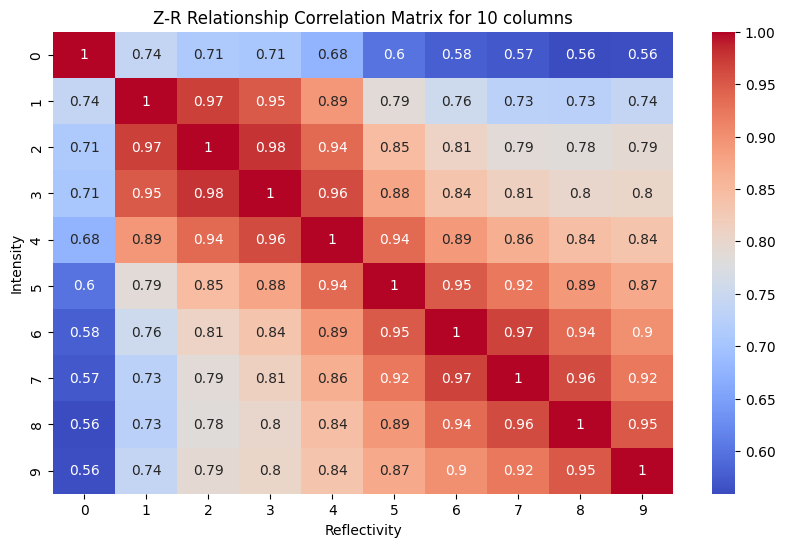

In [11]:
name_Z = []
n_C = np.arange(10)
for i in range(len(n_C)):
    name_Z.append('Reflectivity_{}'.format(i))

Z_sub = Reflectivity_pd.iloc[:, n_C]
R_sub = Intensity_pd.iloc[:, n_C]

Mix = pd.concat([Z_sub, R_sub])
Corr_Matrix = Mix.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(Corr_Matrix, annot=True, cmap='coolwarm')
plt.title('Z-R Relationship Correlation Matrix for {} columns'.format(len(n_C)))
plt.xlabel('Reflectivity')
plt.ylabel('Intensity')
plt.show()

As expected, if the `reflectivity` value is high, the `intensity` of the echo captured by the radar should also be high. This correlation matrix helps us understand this inherent relationship between the two variables.

### 📉 Standard deviation per column, mean, median for Reflectivity & Intensity Variable📈

In [12]:
Reflectivity_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,984,985,986,987,988,989,990,991,992,993
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.00000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,20.359722,26.183333,26.485417,26.662500,25.779167,22.984722,21.631944,20.657639,20.524306,20.34375,...,-31.630556,-31.632639,-31.565278,-31.569444,-31.693750,-31.565278,-31.572222,-31.640278,-31.875000,-31.881250
std,17.661960,9.446084,8.474998,7.727089,7.991989,9.882293,10.658563,11.215295,11.621603,11.41286,...,4.039913,4.013205,4.395666,4.349560,3.666224,4.392738,4.322813,3.931672,2.373723,2.251903
min,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
25%,21.000000,20.000000,21.000000,21.000000,21.000000,16.375000,14.000000,11.500000,11.500000,10.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
50%,25.000000,27.000000,28.000000,28.500000,26.500000,23.000000,22.000000,21.750000,22.500000,21.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
75%,28.000000,30.000000,31.500000,32.500000,31.500000,30.500000,30.500000,29.500000,30.000000,30.00000,...,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000,-32.000000
max,42.500000,48.500000,43.500000,43.000000,42.000000,43.500000,43.500000,46.500000,45.500000,45.00000,...,17.500000,15.500000,17.500000,13.500000,13.500000,14.500000,14.500000,15.000000,15.500000,11.500000


In [13]:
Intensity_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,984,985,986,987,988,989,990,991,992,993
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.925087,0.481944,0.414236,0.420139,0.338542,0.174306,0.201215,0.238021,0.244705,0.245833,...,-7.901997,-7.916406,-7.875781,-7.886458,-7.883594,-7.890712,-7.930122,-7.916927,-7.906684,-7.941233
std,1.428312,1.055675,0.960975,0.937191,0.985192,0.812048,0.776981,0.769802,0.703679,0.743638,...,0.852828,0.767716,1.024853,0.925165,0.943946,0.987534,0.709350,0.859593,0.971679,0.737393
min,-7.937500,-7.937500,-7.937500,-7.937500,-7.937500,-7.062500,-4.875000,-7.312500,-3.500000,-5.125000,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
25%,0.750000,0.125000,0.000000,0.062500,0.000000,-0.062500,0.000000,0.000000,0.000000,0.000000,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
50%,1.125000,0.468750,0.375000,0.375000,0.312500,0.250000,0.250000,0.312500,0.312500,0.312500,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
75%,1.437500,1.062500,0.937500,0.890625,0.750000,0.562500,0.625000,0.640625,0.625000,0.625000,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
max,4.937500,4.437500,3.687500,2.625000,3.375000,2.500000,3.000000,2.250000,2.937500,2.250000,...,2.625000,1.000000,3.812500,1.312500,1.125000,3.937500,0.125000,4.500000,6.062500,3.000000


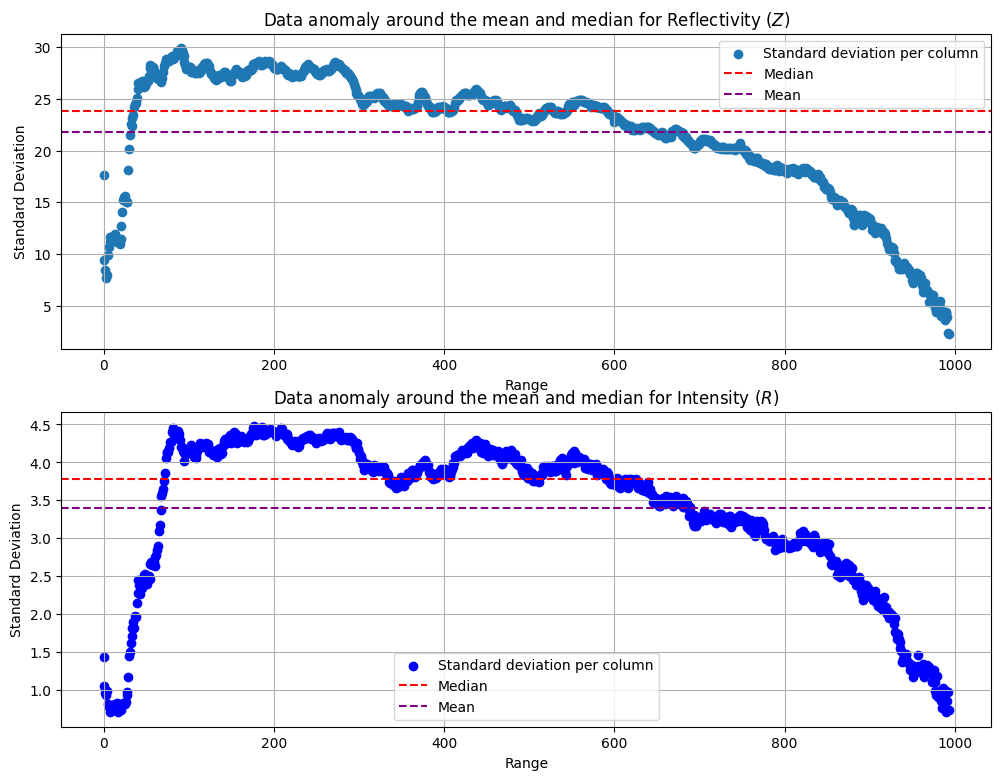

In [52]:
plt.figure(figsize=(12, 9))

ax_1 = plt.subplot(211)
plt.scatter(Reflectivity_pd.describe().iloc[2].index, Reflectivity_pd.describe().iloc[2], label='Standard deviation per column')
plt.title('Data anomaly around the mean and median for Reflectivity $(Z)$')
plt.axhline(y=Reflectivity_pd.describe().iloc[2].median(), color='r', linestyle='--' ,label= 'Median')
plt.axhline(y=Reflectivity_pd.describe().iloc[2].mean(), color='purple', linestyle='--' ,label= 'Mean')
plt.xlabel('Range')
plt.ylabel('Standard Deviation')
plt.grid()
plt.legend()

ax_2 = plt.subplot(212)
plt.scatter(Intensity_pd.describe().iloc[2].index, Intensity_pd.describe().iloc[2], label='Standard deviation per column', color='blue')
plt.title('Data anomaly around the mean and median for Intensity $(R)$')
plt.axhline(y=Intensity_pd.describe().iloc[2].median(), color='r', linestyle='--' ,label= 'Median')
plt.axhline(y=Intensity_pd.describe().iloc[2].mean(), color='purple', linestyle='--' ,label= 'Mean')
plt.xlabel('Range')
plt.ylabel('Standard Deviation')

plt.grid()
plt.legend()
plt.show()

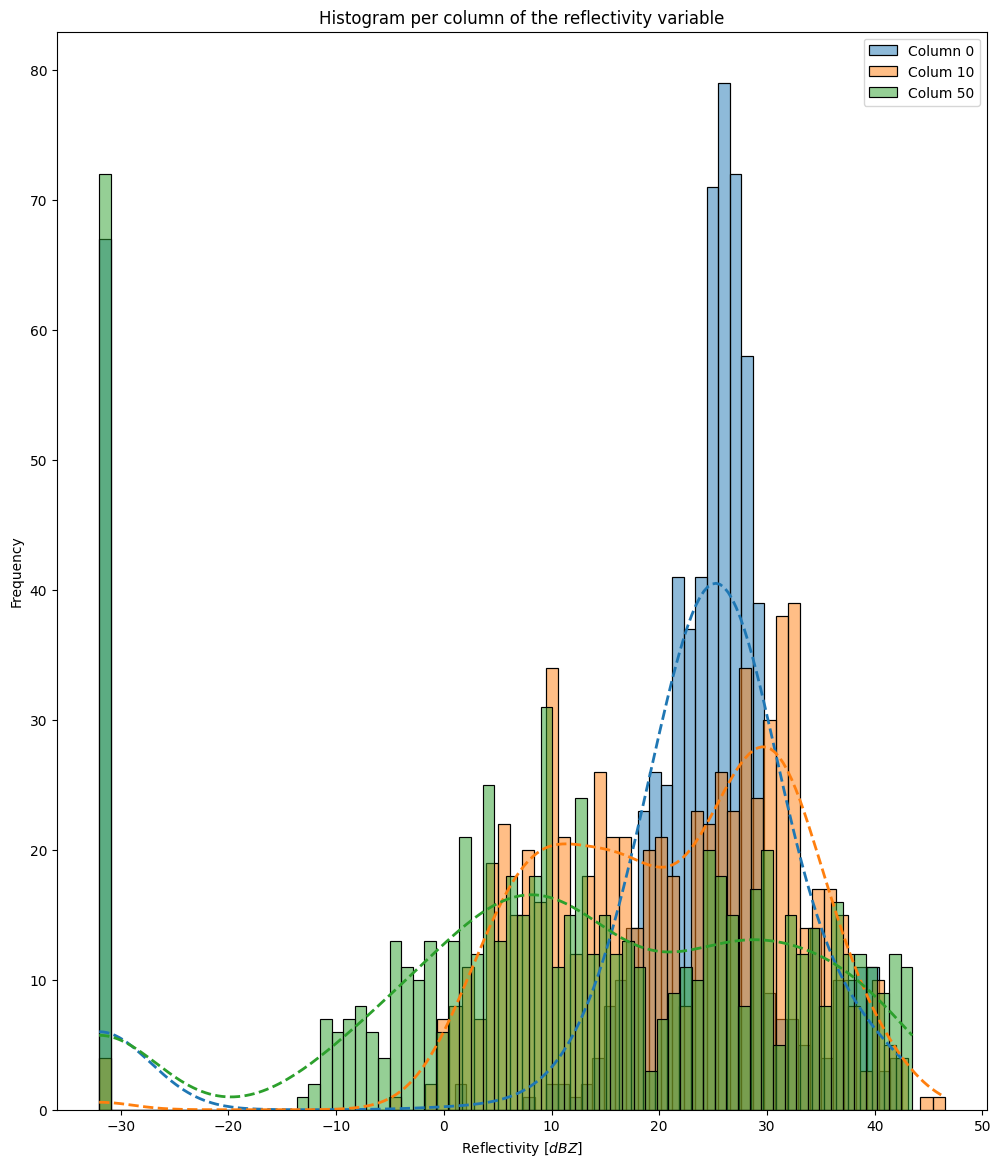

CPU times: total: 406 ms
Wall time: 398 ms


In [15]:
plt.figure(figsize=(12, 14))
#Reflectivity_pd[0].hist(bins=70)
sns.histplot(Reflectivity_pd[0], kde = True, label='Column 0', bins=70,
            line_kws = {'linestyle':'dashed',
                        'linewidth':'2'}).lines[0]
sns.histplot(Reflectivity_pd[10], kde = True, label='Colum 10', bins=70,
            line_kws = {'linestyle':'dashed',
                        'linewidth':'2'}).lines[0]
sns.histplot(Reflectivity_pd[30], kde = True, label='Colum 50', bins=70,
            line_kws = {'linestyle':'dashed',
                        'linewidth':'2'}).lines[0]
plt.title('Histogram per column of the reflectivity variable')
plt.xlabel('Reflectivity $[dBZ]$')
plt.ylabel('Frequency')
plt.legend()

%time plt.show()

⚠`Important` ⚠

The graph shows that as the radar scans horizontally, most reflectivity values ​​move from 27 dBZ to -32 dBZ. These high reflectivity values ​​indicate the presence of a water-laden cloud. The initial high reflectivity suggests the position of the cloud in that initial azimuth range, while the subsequent decrease towards -32 dBZ in subsequent scans implies an absence of precipitation.

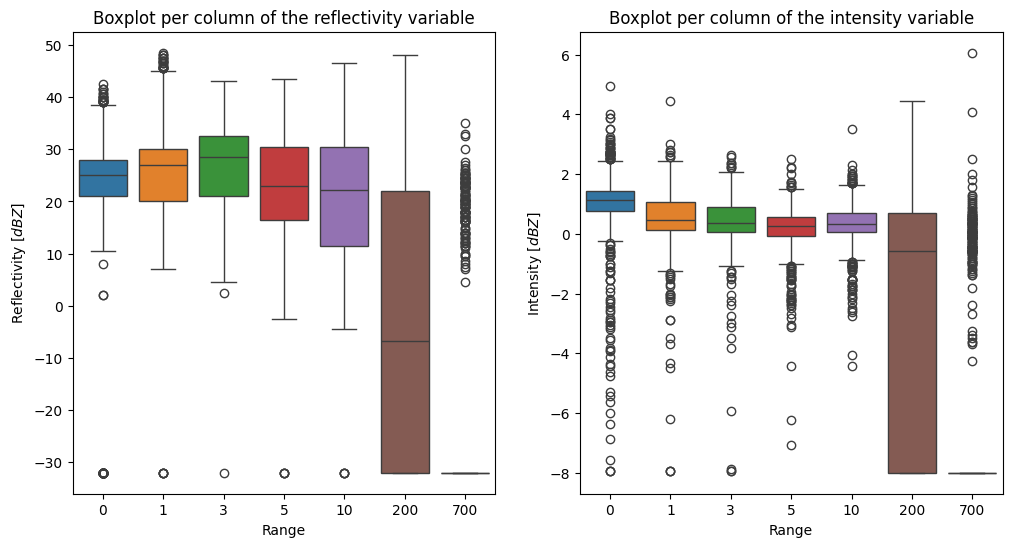

In [53]:
#%time sns.histplot(Reflectivity_pd, bins=30)
pd_Ref = [Reflectivity_pd[0], Reflectivity_pd[1], Reflectivity_pd[3], Reflectivity_pd[5], Reflectivity_pd[10], Reflectivity_pd[200], Reflectivity_pd[700]]
pd_Int = [Intensity_pd[0], Intensity_pd[1], Intensity_pd[3], Intensity_pd[5], Intensity_pd[10], Intensity_pd[200], Intensity_pd[700]]

plt.figure(figsize=(12, 6))

boxplot_Ref = plt.subplot(121)
sns.boxplot(pd_Ref)
plt.title('Boxplot per column of the reflectivity variable')
plt.xlabel('Range')
plt.ylabel('Reflectivity $[dBZ]$')

Boxplot_Inte = plt.subplot(122)
sns.boxplot(pd_Int)
plt.title('Boxplot per column of the intensity variable')
plt.xlabel('Range')
plt.ylabel('Intensity $[dBZ]$')

plt.show()

⚠`Important`⚠

This boxplot highlights the preceding observation. Data points corresponding to larger azimuth ranges exhibit minimal reflectivity and intensity, with nearly all values approaching $-32\ dBZ$ at $n_{azimuth}\ =\ 700$. Consequently, an atmospheric reconstruction based on this radar sweep would likely reveal a bright region in the initial azimuthal angles, transitioning to a predominantly dark region as the azimuth angle increases.

### Scatter plot

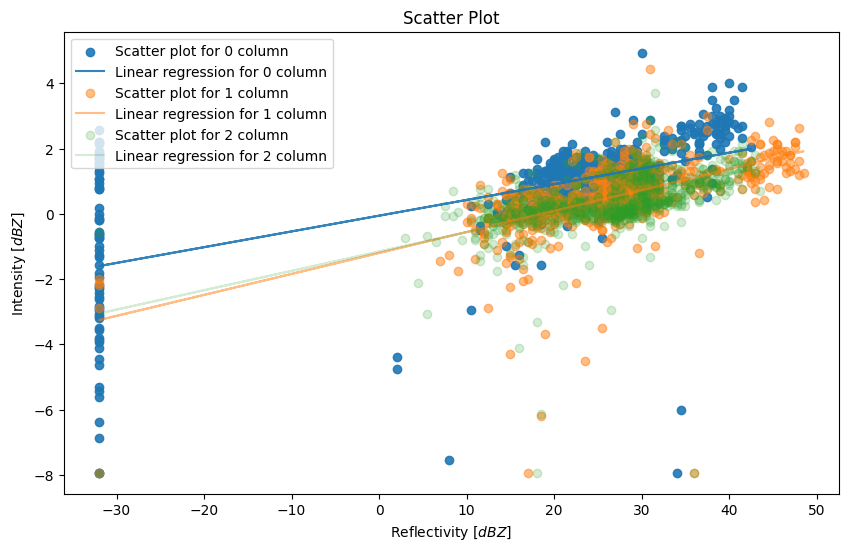

In [17]:
alpha_i = [0.9, 0.5, 0.2]

plt.figure(figsize=(10, 6))
plt.title('Scatter Plot')
for i in range(0,3,1):
    coef = np.polyfit(Reflectivity_pd[i].values,Intensity_pd[i].values,1)
    poly1d_fn = np.poly1d(coef)

    plt.scatter(Reflectivity_pd[i], Intensity_pd[i], alpha=alpha_i[i], label='Scatter plot for {} column'.format(i))
    plt.plot(Reflectivity_pd[i].values,poly1d_fn(Reflectivity_pd[i].values), alpha=alpha_i[i],label='Linear regression for {} column'.format(i))

plt.xlabel('Reflectivity $[dBZ]$')
plt.ylabel('Intensity $[dBZ]$')
plt.legend(loc='upper left')

plt.show()

### Now we will apply some robust measures for centrality such as interquartile range.

In [22]:
Q_1_Ref = Reflectivity_pd.quantile(0.25)
Q_3_Ref = Reflectivity_pd.quantile(0.75)
IQR_Ref = Q_3_Ref - Q_1_Ref #Calculate the interquartile range for all dataset

print('The interquartile range per column is:')
IQR_Ref

The interquartile range per column is:


0       7.0
1      10.0
2      10.5
3      11.5
4      10.5
       ... 
989     0.0
990     0.0
991     0.0
992     0.0
993     0.0
Length: 994, dtype: float64

### MAD

In [23]:
Q_2_Ref = Reflectivity_pd.quantile(0.5)
Refle_Mad = abs(Reflectivity_pd - Q_2_Ref).median() #Calculte Mean absolute deviation

print('Reflectivity MAD: {}'.format(Refle_Mad))

Reflectivity MAD: 0      3.5
1      4.5
2      5.0
3      5.5
4      5.0
      ... 
989    0.0
990    0.0
991    0.0
992    0.0
993    0.0
Length: 994, dtype: float64


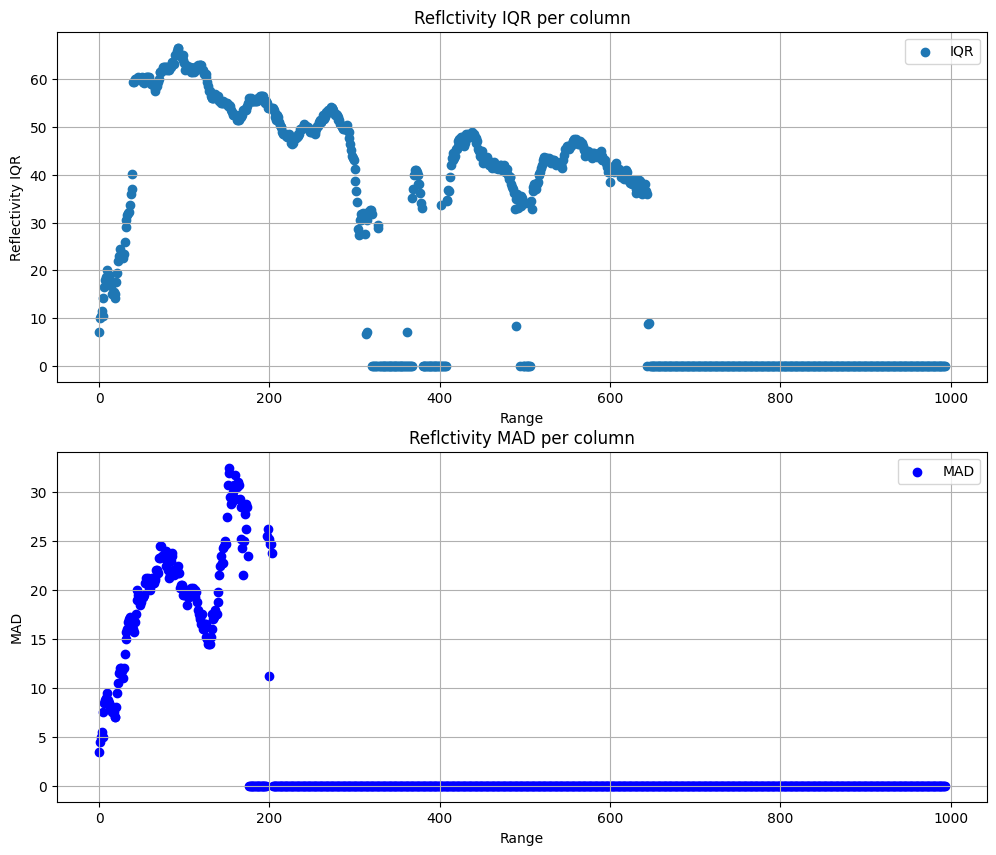

In [57]:
plt.figure(figsize=(12, 10))

ax_IQR_Ref = plt.subplot(211)
plt.title('Reflctivity IQR per column')
plt.scatter(IQR_Ref.index, IQR_Ref, label='IQR')
plt.xlabel('Range')
plt.ylabel('Reflectivity IQR')
plt.grid()
plt.legend()

ax__MAD_Ref = plt.subplot(212)
plt.title('Reflctivity MAD per column')
plt.scatter(Refle_Mad.index, Refle_Mad, label='MAD', color='blue')
plt.xlabel('Range')
plt.ylabel('MAD')

plt.grid()
plt.legend()
plt.show()

`What does this mean?`

These statistical dispersion metrics reveal how the data spread varies with azimuth angle. The initial azimuthal ranges exhibit significant variability. Conversely, for larger angles, the lack of strong EM probe echoes results in minimal data dispersion, indicating a relatively homogeneous return.

### Yule-Kendall Index 

0     -0.142857
1     -0.400000
2     -0.333333
3     -0.304348
4     -0.047619
         ...   
989         NaN
990         NaN
991         NaN
992         NaN
993         NaN
Length: 994, dtype: float64


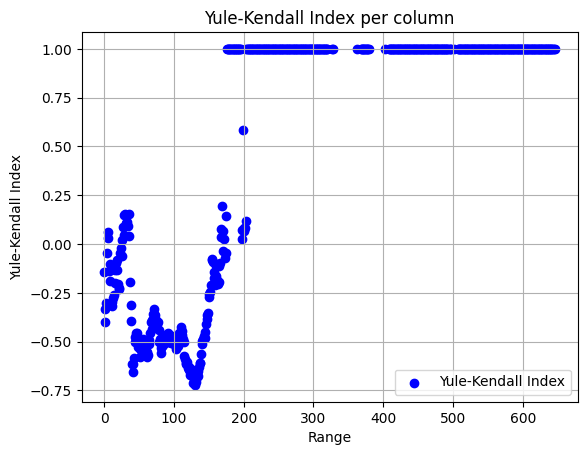

In [55]:
I_YK = (Q_1_Ref - 2*Q_2_Ref + Q_3_Ref) / IQR_Ref

print(I_YK)

plt.subplot()
plt.title('Yule-Kendall Index per column')
plt.scatter(I_YK.index, I_YK, label='Yule-Kendall Index', color='blue')
plt.xlabel('Range')
plt.ylabel('Yule-Kendall Index')

plt.grid()
plt.legend()
plt.show()

The `Yule-Kendall index`, as a measure of symmetry, supports the observed bimodal behavior. The initial region, characterized by low symmetry and high variability, indicates a heterogeneous distribution of the data. In contrast, the posterior region, with almost perfect symmetry $YK = 1$, suggests a homogeneous region where the radar did not detect precipitation. A reconstruction based on the radar measurements will validate the inferences made in this paper.

## 📡 Radar image reconstruction 📡

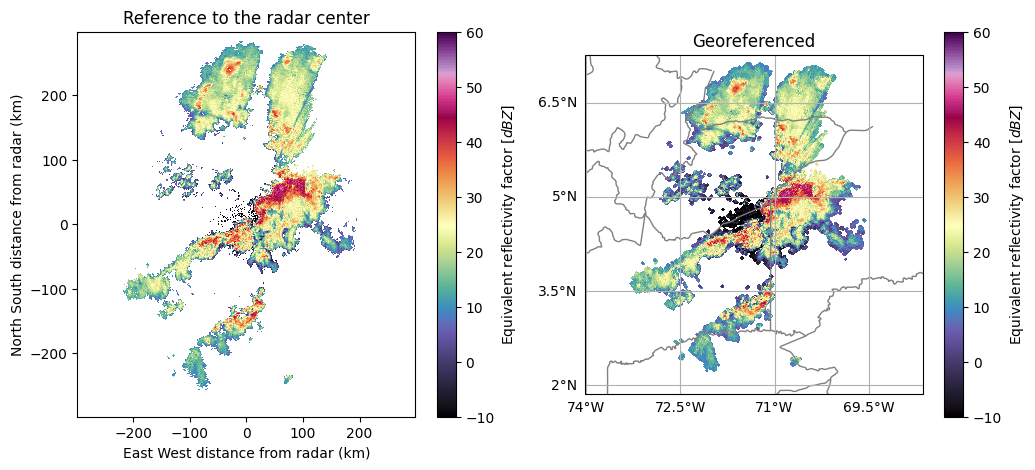

In [46]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)   #significa que la figura se dividirá en una cuadrícula de 1 fila y 2 columnas, y este subplot se ubicará en la primera posición (superior izquierda)
display_ = pyart.graph.RadarDisplay(radar_pa)
display_.plot(
    "reflectivity", #Especifica que se desea trazar la variable de reflectividad
    0,  #Indica el ángulo de elevación en el que se desea mostrar los datos
    ax=ax,
    colorbar_label="Equivalent reflectivity factor $[dBZ]$",
    cmap="ChaseSpectral",   #Utiliza la paleta de colores "ChaseSpectral" para representar los diferentes niveles de reflectividad.
    vmin=-10, #Establecen los valores mínimo y máximo de la escala de colores.
    vmax=60,
    title="Reference to the radar center",
)

projection = ccrs.PlateCarree() #Esta proyección es útil para representar áreas relativamente pequeñas de la Tierra.
ax1 = plt.subplot(122, projection=projection)
display_ = pyart.graph.RadarMapDisplay(radar_pa)
# Extraer la latitud y longitud del radar y usarla para centrar el mapa
lat_center = round(radar_pa.latitude["data"][0], 0)
lon_center = round(radar_pa.longitude["data"][0], 0)


# Determinar los anchos
lat_ticks = np.arange(lat_center - 3, lat_center + 3, 1.5)
lon_ticks = np.arange(lon_center - 3, lon_center + 3, 1.5)

# Fijar la proyección - en este caso, usamos la proyección general PlateCarree

display_.plot_ppi_map(  #se utiliza para crear un mapa PPI (Plan Position Indicator) de los datos de reflectividad.
    "reflectivity",
    0,
    resolution="10m",
    ax=ax1,
    lat_lines=lat_ticks,
    lon_lines=lon_ticks,
    colorbar_label="Equivalent reflectivity factor $[dBZ]$",
    cmap="ChaseSpectral",
    vmin=-10,
    vmax=60,
    title="Georeferenced",
)

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       longitude            float64 8B -71.33
│       latitude             float64 8B 4.564
│       altitude             float64 8B 206.0
│       volume_number        int32 4B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2022-08-09T19:15:05Z'
│       time_coverage_end    <U20 80B '2022-08-09T19:16:21Z'
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
├── DataTree('radar_parameters')
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
│       Data variables:
│           *empty*
└── DataTree('sweep_0')
        Dimensions:            (azimuth: 720, range: 994)
        Coordinates:
            elevation          (azimuth) float32 3kB ...
            time               (azimuth) datetime64[ns] 6kB 2022-08-09T19:15:56.89100...
          * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
            longitude          float64 8B ...
            latitude           float64 8B ...
            altitude           float64 8B ...
          * azimuth            (azimuth) float32 3kB 0.03571 0.5795 ... 359.0 359.6
        Data variables: (12/17)
            DBTH               (azimuth, range) float32 3MB ...
            DBZH               (azimuth, range) float32 3MB ...
            VRADH              (azimuth, range) float32 3MB ...
            WRADH              (azimuth, range) float32 3MB ...
            ZDR                (azimuth, range) float32 3MB ...
            KDP                (azimuth, range) float32 3MB ...
            ...                 ...
            DB_DBZE8           (azimuth, range) float32 3MB ...
            sweep_mode         <U20 80B ...
            sweep_number       int32 4B ...
            prt_mode           <U7 28B ...
            follow_mode        <U7 28B ...
            sweep_fixed_angle  float64 8B ...

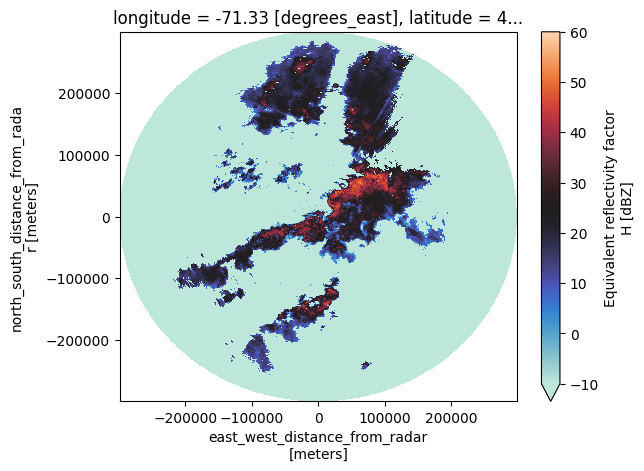

In [44]:
radar_xd = xd.io.open_iris_datatree(f"./data/CAR220809191504.RAWDSX2")
display(radar_xd)

radar = radar_xd.xradar.georeference()

radar_xd["sweep_0"]["DBZH"].plot(x="x", y="y", cmap="icefire", vmin=-10, vmax=60)

## References

1. Ladino-Rincon A., Rivera N., Grover M. (2023), Taller de datos científicos con Python y R - AtmosCol 2023 (Versión v2023.09.19) [https://doi.org/10.5281/zenodo.8347110]

In [ ]:
#Colors 
# 'Accent', 'Accent_r', 'BlueBrown10', 'BlueBrown10_r', 'BlueBrown11', 
# 'BlueBrown11_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BrBu10', 'BrBu10_r', 'BrBu12', 'BrBu12_r', 'Bu10', 'Bu10_r', 'Bu7', 'Bu7_r', 'BuDOr12', 
# 'BuDOr12_r', 'BuDOr18', 'BuDOr18_r', 'BuDRd12', 'BuDRd12_r', 'BuDRd18', 'BuDRd18_r', 'BuGn', 'BuGn_r', 'BuGr14', 'BuGr14_r', 'BuGy8', 'BuGy8_r', 
# 'BuOr10', 'BuOr10_r', 'BuOr12', 'BuOr12_r', 'BuOr8', 'BuOr8_r', 'BuOrR14', 'BuOrR14_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'CM_depol', 'CM_depol_r',
#  'CM_rhohv', 'CM_rhohv_r', 'Carbone11', 'Carbone11_r', 'Carbone17', 'Carbone17_r', 'Carbone42', 'Carbone42_r', 'Cat12', 'Cat12_r', 'ChaseSpectral', 
# 'ChaseSpectral_r', 'Dark2', 'Dark2_r', 'EWilson17', 'EWilson17_r', 'GnBu', 'GnBu_r', 'GrMg16', 'GrMg16_r', 'Gray5', 'Gray5_r', 'Gray9', 'Gray9_r', 
# 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'HomeyerRainbow', 'HomeyerRainbow_r', 'LangRainbow12', 'LangRainbow12_r', 'NWSRef', 'NWSRef_r', 
# 'NWSVel', 'NWSVel_r', 'NWS_CC', 'NWS_CC_r', 'NWS_SPW', 'NWS_SPW_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PD17', 'PD17_r', 'PRGn', 'PRGn_r',
#  'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd',
#  'PuRd_r', 'Purples', 'Purples_r', 'RRate11', 'RRate11_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu11b', 'RdYlBu11b_r', 
# 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'RefDiff', 'RefDiff_r', 'SCook18', 'SCook18_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r',
#  'Spectral', 'SpectralExtended', 'SpectralExtended_r', 'Spectral_r', 'StepSeq25', 'StepSeq25_r', 'SymGray12', 'SymGray12_r', 'Theodore16', 'Theodore16_r', 
# 'Wild25', 'Wild25_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 
# 'autumn', 'autumn_r', 'balance', 'balance_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
# 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r',
#  'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
# 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 
# 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
#  'plasma', 'plasma_r', 'plasmidis', 'plasmidis_r', 'prism', 'prism_r', 'pyart_BlueBrown10', 'pyart_BlueBrown10_r', 'pyart_BlueBrown11', 'pyart_BlueBrown11_r', 
# 'pyart_BrBu10', 'pyart_BrBu10_r', 'pyart_BrBu12', 'pyart_BrBu12_r', 'pyart_Bu10', 'pyart_Bu10_r', 'pyart_Bu7', 'pyart_Bu7_r', 'pyart_BuDOr12', 'pyart_BuDOr12_r', 
# 'pyart_BuDOr18', 'pyart_BuDOr18_r', 'pyart_BuDRd12', 'pyart_BuDRd12_r', 'pyart_BuDRd18', 'pyart_BuDRd18_r', 'pyart_BuGr14', 'pyart_BuGr14_r', 'pyart_BuGy8', 
# 'pyart_BuGy8_r', 'pyart_BuOr10', 'pyart_BuOr10_r', 'pyart_BuOr12', 'pyart_BuOr12_r', 'pyart_BuOr8', 'pyart_BuOr8_r', 'pyart_BuOrR14', 'pyart_BuOrR14_r', 
# 'pyart_Carbone11', 'pyart_Carbone11_r', 'pyart_Carbone17', 'pyart_Carbone17_r', 'pyart_Carbone42', 'pyart_Carbone42_r', 'pyart_Cat12', 'pyart_Cat12_r', 
# 'pyart_ChaseSpectral', 'pyart_ChaseSpectral_r', 'pyart_EWilson17', 'pyart_EWilson17_r', 'pyart_GrMg16', 'pyart_GrMg16_r', 'pyart_Gray5', 'pyart_Gray5_r', 
# 'pyart_Gray9', 'pyart_Gray9_r', 'pyart_HomeyerRainbow', 'pyart_HomeyerRainbow_r', 'pyart_LangRainbow12', 'pyart_LangRainbow12_r', 'pyart_NWSRef', 
# 'pyart_NWSRef_r', 'pyart_NWSVel', 'pyart_NWSVel_r', 'pyart_NWS_SPW', 'pyart_NWS_SPW_r', 'pyart_PD17', 'pyart_PD17_r', 'pyart_RRate11', 'pyart_RRate11_r',
#  'pyart_RdYlBu11b', 'pyart_RdYlBu11b_r', 'pyart_RefDiff', 'pyart_RefDiff_r', 'pyart_SCook18', 'pyart_SCook18_r', 'pyart_SpectralExtended', 
# 'pyart_SpectralExtended_r', 'pyart_StepSeq25', 'pyart_StepSeq25_r', 'pyart_SymGray12', 'pyart_SymGray12_r', 'pyart_Theodore16', 'pyart_Theodore16_r',
# 'pyart_Wild25', 'pyart_Wild25_r', 'pyart_balance', 'pyart_balance_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 
# 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo',
#  'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'